# Demo - Time Series Symbolization with VMO

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import vmo

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.cluster import KMeans
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Generate Swirl Circle Data

In [3]:
n_samples = 100
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1,n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X = np.concatenate((x, y))
X += 1. * np.random.randn(2, n_samples)
X = X.T
idx = np.argsort(t[0,:])
X = X[idx]
t = np.sort(t)

x_feature = X

## VMO

In [4]:
r_x = (0.0, 4, 0.05) 
ideal_x = vmo.find_threshold(x_feature, r_x, dim=x_feature.shape[1])
oracle_x = vmo.build_oracle(x_feature, flag = 'a', 
                            threshold = ideal_x[0][1], 
                            feature = 'skel',
                            dim=x_feature.shape[1])

## HMM-GMM

In [5]:
model_x = GaussianHMM(len(oracle_x.latent), covariance_type="diag", n_iter=1000)
model_x.fit(x_feature)
hidden_states_x = model_x.predict(x_feature)

## K-Means

In [7]:
n_components_x = len(oracle_x.latent)
kmean_x = KMeans(n_clusters = n_components_x//2, init = 'k-means++', n_init = 10)
kmean_x.fit(x_feature)
k_cluster_x = kmean_x.predict(x_feature)

## Plots

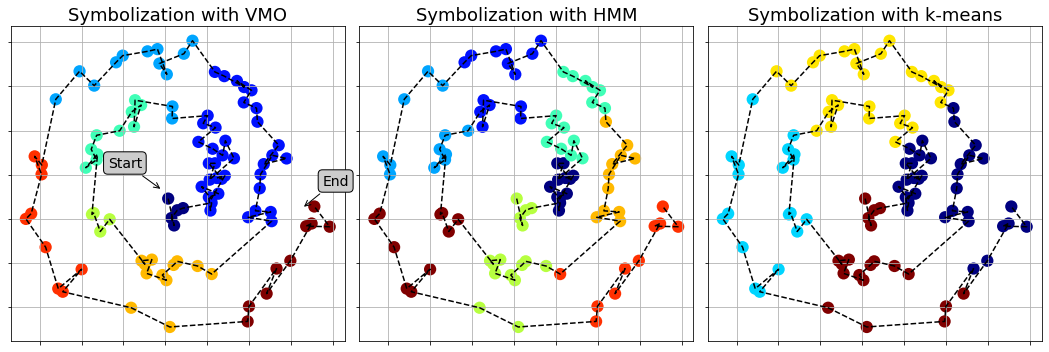

In [8]:
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

fig = plt.figure(figsize = (15,5))
ax7 = fig.add_subplot(131)
ax7.set_title('Symbolization with VMO', fontsize = 18)
ax7.plot(X[:,0],X[:,1],'k--')
ax7.scatter(X[:,0],X[:,1], c = np.array(oracle_x.data[1:]), cmap = 'jet', s = 150, edgecolors='none' )

ax7.annotate('Start', xy=(0.15, 0.45),  xycoords='figure fraction',
             xytext=(-20, 20), textcoords='offset points',
             ha="right", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args,fontsize = 14
             )

ax7.annotate('End', xy=(0.28, 0.4),  xycoords='figure fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args,fontsize = 14
             )

ax7.grid(b = 'on')
ax7.set_xticklabels([])
ax7.set_yticklabels([])

ax8 = fig.add_subplot(132)
ax8.set_title('Symbolization with HMM',fontsize = 18)
ax8.plot(X[:,0],X[:,1],'k--')
ax8.scatter(X[:,0],X[:,1], c = hidden_states_x, cmap = 'jet', s = 150, edgecolors='none')
ax8.grid(b = 'on')
ax8.set_xticklabels([])
ax8.set_yticklabels([])

ax9 = fig.add_subplot(133)
ax9.set_title('Symbolization with k-means',fontsize = 18)
ax9.plot(X[:,0],X[:,1],'k--')
ax9.scatter(X[:,0],X[:,1], c = k_cluster_x, cmap = 'jet', s = 150, edgecolors='none')
ax9.grid(b = 'on')
ax9.set_xticklabels([])
ax9.set_yticklabels([])

fig.tight_layout()

## Print Out Symbolized Sequence from VMO, HMM-GMM and K-means

In [8]:
print oracle_x.data[1:]
print hidden_states_x
print k_cluster_x

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 2
 7 7 7 7 4 4 4 4 4 4 4 4 4 6 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 7 7 7 7 7 7 4 4 6 6 6 6 6 6 6 6 6]
[3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 3 3 3 3 0 3 0 0 0 0 0]
